In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
# Use units in tune to the syustem to reduce numbers
# Rewrite the equations

# Define 4 ODE 
n_step = 2000
v_r = np.zeros(n_step)
v_theta = np.zeros(n_step)
r = np.zeros(n_step)
theta = np.zeros(n_step)

m1 = 1.989e30 #sun mass
m2 = 5.97219e24 # earth mass
# m = (m1 * m2) / (m1 + m2)
m = m1 + m2

#Setting initial conditions
v_r[0] = 19400
v_theta[0] = 2 * np.pi / 86400
r[0] = 146608000000
# theta = np.linspace(0, 2 * np.pi, n_step)
theta[0] = 0


# Take in energy and angular momentum to initiate

G = 6.674e-11
L = 2.67e40

#Evolve time with theta
dt = 1e30

In [60]:
# Define useful functions
def v_r_dot(r, v_theta, G, m):
    return r * v_theta**2 - G * m / r**2

def v_theta_dot(r, v_r, v_theta):
    return -2 * v_r * v_theta / r

def rk4_step(r, k, dt):
    return r + k * dt / 2

def rk4_final_step(r, k, dt):
    return r + k * dt

def rk4_forward(r, dt, k1, k2, k3, k4):
    return r + dt * (k1 + 2* k2 + 2*k3 + k4)/ 6

k = np.zeros(4)
g = np.zeros(4)
h = np.zeros(4)
l = np.zeros(4)


In [61]:
for i in range(n_step-1):
    print("step:", i)
    # Use k g h l as value storers in each rk4 step
    r_tempt = v_r[i]
    theta_tempt = v_theta[i]
    v_r_tempt = v_r_dot(r[i], v_theta[i], G, m)
    v_theta_tempt = v_theta_dot(r[i], v_r[i], v_theta[i])
    
    for j in range(3):
        print("sub_step:", j)
        k[j] = v_r_tempt
        g[j] = v_theta_tempt
        h[j] = v_r_dot(r_tempt, v_theta_tempt, G, m)
        l[j] = v_theta_dot(r_tempt, v_r_tempt, v_theta[i])

        r_tempt = rk4_step(r[i], k[j], dt)
        theta_tempt = rk4_step(theta[i], g[j], dt)
        v_r_tempt = rk4_step(v_r[i], h[j], dt)
        v_theta_tempt = rk4_step(v_theta[i], l[j], dt)
    
    
    r_tempt = rk4_final_step(r[i], k[2], dt)
    theta_tempt = rk4_final_step(theta[i], g[2], dt)
    v_r_tempt = rk4_final_step(v_r[i], h[2], dt)
    v_theta_tempt = rk4_final_step(v_theta[i], l[2], dt)

    k[3] = v_r_tempt
    g[3] = v_theta_tempt
    h[3] = v_r_dot(r_tempt, v_theta_tempt, G, m)
    l[3] = v_theta_dot(r_tempt, v_r_tempt, v_theta[i])
        

    r[i+1] = rk4_forward(r[i], dt, k[0], k[1], k[2], k[3])
    theta[i+1] = rk4_forward(theta[i], dt, g[0], g[1], g[2], g[3])
    v_r[i+1] = rk4_forward(v_r[i], dt, h[0], h[1], h[2], h[3])
    v_theta[i+1] = rk4_forward(v_theta[i], dt, l[0], l[1], l[2], l[3])



step: 0
sub_step: 0
sub_step: 1
sub_step: 2
step: 1
sub_step: 0
sub_step: 1
sub_step: 2
step: 2
sub_step: 0
sub_step: 1
sub_step: 2
step: 3
sub_step: 0
sub_step: 1
sub_step: 2
step: 4
sub_step: 0
sub_step: 1
sub_step: 2
step: 5
sub_step: 0
sub_step: 1
sub_step: 2
step: 6
sub_step: 0
sub_step: 1
sub_step: 2
step: 7
sub_step: 0
sub_step: 1
sub_step: 2
step: 8
sub_step: 0
sub_step: 1
sub_step: 2
step: 9
sub_step: 0
sub_step: 1
sub_step: 2
step: 10
sub_step: 0
sub_step: 1
sub_step: 2
step: 11
sub_step: 0
sub_step: 1
sub_step: 2
step: 12
sub_step: 0
sub_step: 1
sub_step: 2
step: 13
sub_step: 0
sub_step: 1
sub_step: 2
step: 14
sub_step: 0
sub_step: 1
sub_step: 2
step: 15
sub_step: 0
sub_step: 1
sub_step: 2
step: 16
sub_step: 0
sub_step: 1
sub_step: 2
step: 17
sub_step: 0
sub_step: 1
sub_step: 2
step: 18
sub_step: 0
sub_step: 1
sub_step: 2
step: 19
sub_step: 0
sub_step: 1
sub_step: 2
step: 20
sub_step: 0
sub_step: 1
sub_step: 2
step: 21
sub_step: 0
sub_step: 1
sub_step: 2
step: 22
sub_step: 0

/var/folders/pb/nsj6z9cj023fgm71bp0lkc240000gn/T/ipykernel_26119/1209312822.py:3: RuntimeWarning: overflow encountered in double_scalars
  return r * v_theta**2 - G * m / r**2
/var/folders/pb/nsj6z9cj023fgm71bp0lkc240000gn/T/ipykernel_26119/1209312822.py:6: RuntimeWarning: overflow encountered in double_scalars
  return -2 * v_r * v_theta / r
/var/folders/pb/nsj6z9cj023fgm71bp0lkc240000gn/T/ipykernel_26119/1209312822.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return -2 * v_r * v_theta / r
/var/folders/pb/nsj6z9cj023fgm71bp0lkc240000gn/T/ipykernel_26119/1209312822.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return r + dt * (k1 + 2* k2 + 2*k3 + k4)/ 6


sub_step: 1
sub_step: 2
step: 330
sub_step: 0
sub_step: 1
sub_step: 2
step: 331
sub_step: 0
sub_step: 1
sub_step: 2
step: 332
sub_step: 0
sub_step: 1
sub_step: 2
step: 333
sub_step: 0
sub_step: 1
sub_step: 2
step: 334
sub_step: 0
sub_step: 1
sub_step: 2
step: 335
sub_step: 0
sub_step: 1
sub_step: 2
step: 336
sub_step: 0
sub_step: 1
sub_step: 2
step: 337
sub_step: 0
sub_step: 1
sub_step: 2
step: 338
sub_step: 0
sub_step: 1
sub_step: 2
step: 339
sub_step: 0
sub_step: 1
sub_step: 2
step: 340
sub_step: 0
sub_step: 1
sub_step: 2
step: 341
sub_step: 0
sub_step: 1
sub_step: 2
step: 342
sub_step: 0
sub_step: 1
sub_step: 2
step: 343
sub_step: 0
sub_step: 1
sub_step: 2
step: 344
sub_step: 0
sub_step: 1
sub_step: 2
step: 345
sub_step: 0
sub_step: 1
sub_step: 2
step: 346
sub_step: 0
sub_step: 1
sub_step: 2
step: 347
sub_step: 0
sub_step: 1
sub_step: 2
step: 348
sub_step: 0
sub_step: 1
sub_step: 2
step: 349
sub_step: 0
sub_step: 1
sub_step: 2
step: 350
sub_step: 0
sub_step: 1
sub_step: 2
step: 351


In [62]:
x = r * np.cos(theta)
y = r * np.sin(theta)

In [63]:
x

array([1.46608000e+011, 1.23519772e+199,             nan, ...,
                   nan,             nan,             nan])

Text(0.5, 1.0, 'RK4 Orbit')

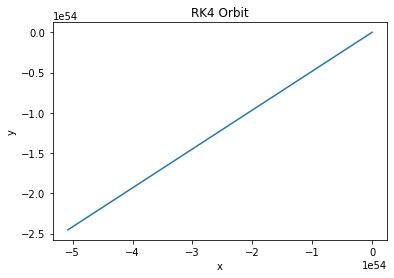

In [48]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('RK4 Orbit')

In [42]:
# Comparison to analytical method
# Use initial conditions listed above

m1 = 1.989e30 #sun mass
m2 = 5.97219e24 # earth mass
m = (m1 * m2) / (m1 + m2)
alpha = G * m1 * m2
a = 1.495e11
e = 0.017
theta = np.linspace(0, 2 * np.pi, 100)

p = L**2 / m / alpha
 # to check
p2 = a * (1 - e)**2
print(p)
print(p2)

r = p / (1 + e * np.cos(theta))

x_ana = r * np.cos(theta)
y_ana = r * np.sin(theta)



150569015012.38382
144460205500.0


Text(0.5, 1.0, 'Analytical Orbit')

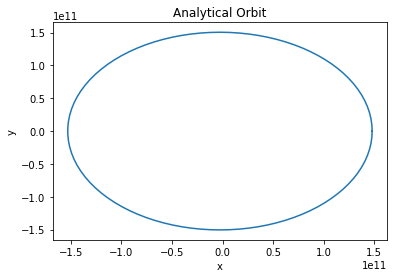

In [120]:
plt.plot(x_ana, y_ana)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Analytical Orbit')

In [123]:
# Error analysis
np.mean((x - x_ana) / x_ana), np.mean((y - y_ana) / y_ana)

/var/folders/pb/nsj6z9cj023fgm71bp0lkc240000gn/T/ipykernel_63958/3639965294.py:2: RuntimeWarning: invalid value encountered in true_divide
  np.mean((x - x_ana) / x_ana), np.mean((y - y_ana) / y_ana)


(-0.026231808386973313, nan)

In [144]:
# Playing with other potentials 
# Define 4 ODE 
n_step = 100
v_r = np.zeros(n_step)
v_theta = np.zeros(n_step)
r = np.zeros(n_step)
theta = np.zeros(n_step)

#Setting initial conditions
v_r[0] = 19400
v_theta[0] = 2 * np.pi / 86400
r[0] = 146608000000
theta = np.linspace(0, 2 * np.pi, n_step)
# theta[0] = 0.001


# Take in energy and angular momentum to initiate

G = 6.674e-11
# L = 2.67e40
dt = 0.01

In [145]:
for i in range(n_step-1):
    L = r[i-1]**2 # Spherically symmetric
    # Use k g h l as value storers in each rk4 step
    k1 = v_r[i]
    # g1 = v_theta[i]
    h1 = r[i] * v_theta[i] **2 - G * L / r[i]**2
    l1 = -2 * v_r[i] * v_theta[i] / r[i]

    r_tempt_1 = r[i] + k1 * dt/2
    # theta_tempt_1 = theta[i] + g1 * dt /2
    v_r_tempt_1 = v_r[i] + h1 * dt /2
    v_theta_tempt_1 = v_theta[i] + l1 * dt/2

    # Step 2
    k2 = v_r_tempt_1
    # g2 = v_theta_tempt_1
    h2 = r_tempt_1 * v_theta_tempt_1 **2 - G * L / r_tempt_1**2
    l2 = -2 * v_r_tempt_1 * v_theta_tempt_1 / r_tempt_1

    r_tempt_2 = r[i] + k2 * dt/2
    # theta_tempt_2 = theta[i] + g2 * dt /2
    v_r_tempt_2 = v_r[i] + h2 * dt /2
    v_theta_tempt_2 = v_theta[i] + l2 * dt/2

    # Step 3
    k3 = v_r_tempt_2
    # g3 = v_theta_tempt_2
    h3 = r_tempt_2 * v_theta_tempt_2 **2 - G * L / r_tempt_2**2
    l3 = -2 * v_r_tempt_2 * v_theta_tempt_2 / r_tempt_2

    r_tempt_3 = r[i] + k3 * dt/2
    # theta_tempt_3 = theta[i] + g3 * dt /2
    v_r_tempt_3 = v_r[i] + h3 * dt /2
    v_theta_tempt_3 = v_theta[i] + l3 * dt/2

    # Step 4
    k4 = v_r_tempt_3
    # g4 = v_theta_tempt_3
    h4 = r_tempt_3 * v_theta_tempt_3 **2 - G * L / r_tempt_3**2
    l4 = -2 * v_r_tempt_3 * v_theta_tempt_3 / r_tempt_3

    r[i+1] = r[i] + dt * (k1 + 2* k2 + 2*k3 + k4)/ 6
    # theta[i+1] = theta[i] + dt * (g1 + 2* g2 + 2*g3 + g4)/ 6
    v_r[i+1] = v_r[i] + dt * (h1 + 2* h2 + 2*h3 + h4)/ 6
    v_theta[i+1] = v_theta[i] + dt * (l1 + 2* l2 + 2*l3 + l4)/ 6


x = r * np.cos(theta)
y = r * np.sin(theta)

/var/folders/pb/nsj6z9cj023fgm71bp0lkc240000gn/T/ipykernel_63958/3418111515.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  L = 1/r[i-1]
/var/folders/pb/nsj6z9cj023fgm71bp0lkc240000gn/T/ipykernel_63958/3418111515.py:29: RuntimeWarning: invalid value encountered in double_scalars
  h3 = r_tempt_2 * v_theta_tempt_2 **2 - G * L / r_tempt_2**2
/var/folders/pb/nsj6z9cj023fgm71bp0lkc240000gn/T/ipykernel_63958/3418111515.py:30: RuntimeWarning: invalid value encountered in double_scalars
  l3 = -2 * v_r_tempt_2 * v_theta_tempt_2 / r_tempt_2
/var/folders/pb/nsj6z9cj023fgm71bp0lkc240000gn/T/ipykernel_63958/3418111515.py:40: RuntimeWarning: invalid value encountered in double_scalars
  h4 = r_tempt_3 * v_theta_tempt_3 **2 - G * L / r_tempt_3**2


Text(0.5, 1.0, 'RK4 Orbit')

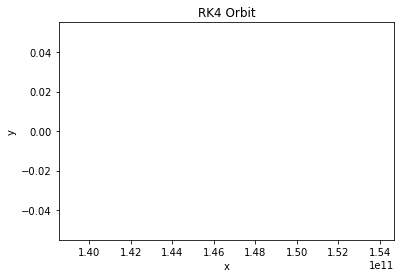

In [146]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('RK4 Orbit')